In [1]:
#Imports Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,classification_report , confusion_matrix
from sklearn.linear_model import LinearRegression , LogisticRegression , Ridge, Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error , mean_absolute_error , accuracy_score ,r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the data
training_data = pd.read_csv("train.csv")

In [3]:
#see first 5 rows of data
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Count the number of rows and columns in the data set 
training_data.shape

(891, 12)

In [6]:
#check the number of missing values in each column
training_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

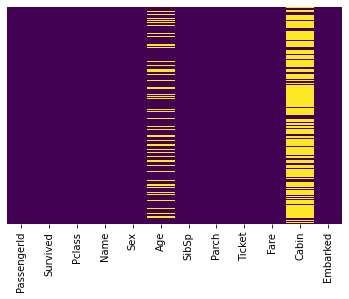

In [7]:
sns.heatmap(training_data.isnull(),yticklabels=False , cbar= False, cmap='viridis')

In [8]:
#yellow color means missing values but i don't know why in embarked column no yellowcolor is appear

In [9]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#First we shouldf fill the cabin column so we will drop ot to fill it then

training_data = training_data.drop(columns = 'Cabin' , axis = 1)


<AxesSubplot:xlabel='Age'>

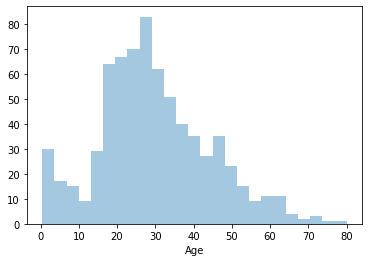

In [11]:
sns.distplot(training_data['Age'].dropna(),kde=False ,bins=25)

<AxesSubplot:ylabel='Frequency'>

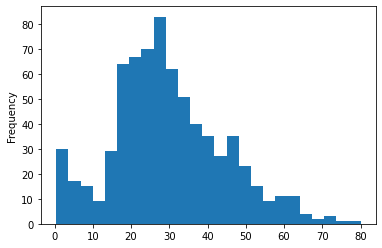

In [12]:
training_data['Age'].plot.hist(bins=25)

In [13]:
#replacing the Age columns values with the mean

training_data["Age"].fillna(training_data["Age"].mean(),inplace=True)

In [14]:
# finding the mode value of Embarked column
print(training_data["Embarked"].mode())

0    S
Name: Embarked, dtype: object


In [15]:
print(training_data["Embarked"].mode()[0])

S


In [16]:
# Replacing the missing values of Embarled column with mode value --> S or 0

training_data["Embarked"].fillna(training_data["Embarked"].mode()[0] , inplace=True)

In [17]:
#Get a count of the number of survivors

training_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
#so we can see that more than the half of passengers dead

In [19]:
#check the number of missing values again
training_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

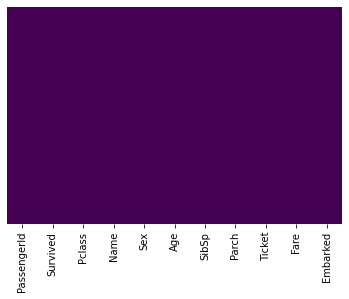

In [20]:
sns.heatmap(training_data.isnull(),yticklabels=False , cbar= False, cmap='viridis')

In [21]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
#finding the number of people who survived and who dead

In [23]:
training_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [24]:
# we can see that more than half of people dead

Data visualization

In [25]:
sns.set()

<AxesSubplot:xlabel='Survived', ylabel='count'>

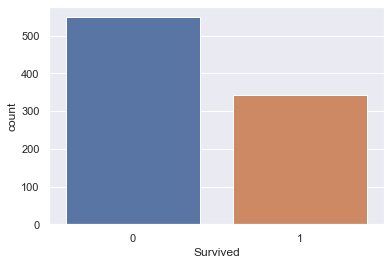

In [26]:
# making a count plot for Survived column
sns.countplot('Survived' , data = training_data)

In [27]:
training_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

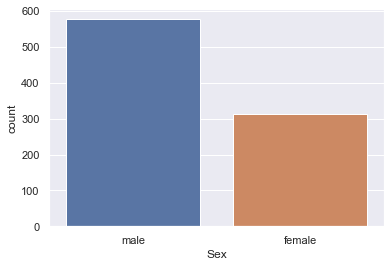

In [28]:
# making a count plot for Sex column
sns.countplot('Sex' , data = training_data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

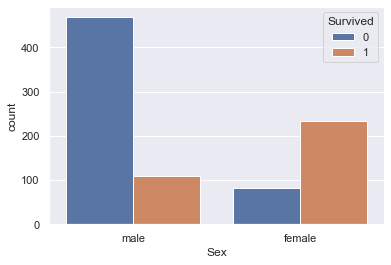

In [29]:
# as we see before the males are more than females but we don't know how many of each geneder is survived
# we need to know each gender how many of them survived
sns.countplot('Sex' , hue='Survived' , data = training_data)

In [30]:
# as we see number of females survived more than males

<AxesSubplot:xlabel='Pclass', ylabel='count'>

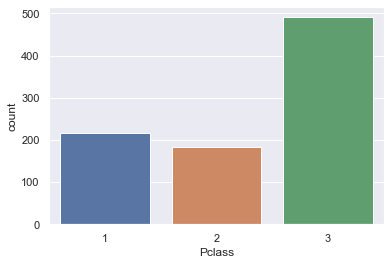

In [31]:
# okay now we want to see the Pclass column
sns.countplot('Pclass' , data = training_data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

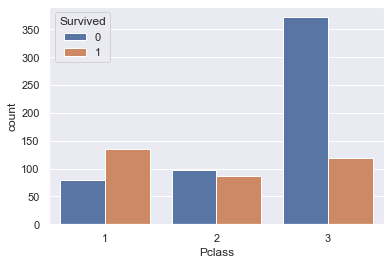

In [32]:
# we need to know each Pclass how many of them survived
sns.countplot('Pclass' , hue='Survived' , data = training_data)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

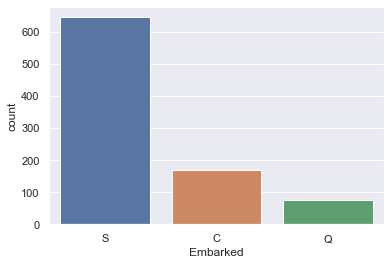

In [33]:
# okay now we want to see the Embarked column
sns.countplot('Embarked' , data = training_data)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

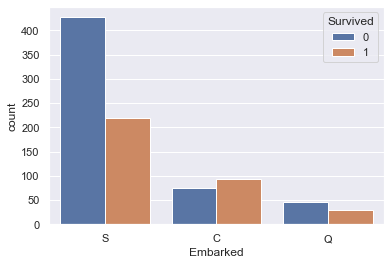

In [34]:
#we need to know each Embarked how many of them survived
sns.countplot('Embarked' , hue='Survived' , data = training_data)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

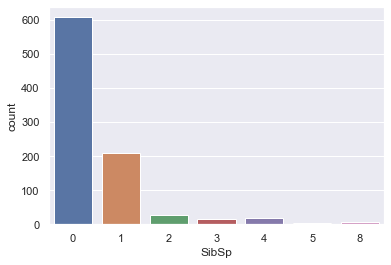

In [35]:
sns.countplot(x='SibSp' , data = training_data)

<AxesSubplot:>

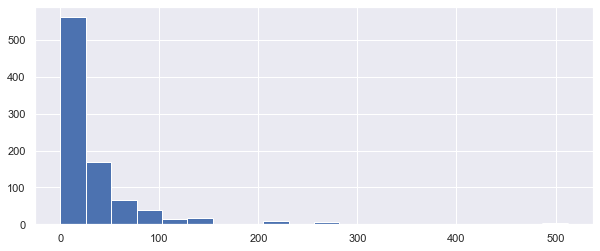

In [36]:
training_data['Fare'].hist(bins=20, figsize=(10,4))

Encoding the data

In [37]:
training_data["Sex"].value_counts()  
#577 + 314 = 891 (no missing values)

male      577
female    314
Name: Sex, dtype: int64

In [38]:
training_data["Embarked"].value_counts()
# 646 + 168 + 77 = 891 (no missing values)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [39]:
#pd.get_dummies(training_data['Sex'])

In [40]:
#sex = pd.get_dummies(training_data['Sex'],drop_first = True)

In [41]:
#sex.head()

In [42]:
#training_data = pd.concat([training_data , sex],axis=1)

In [43]:
#training_data.head()

In [44]:
le = LabelEncoder()

In [45]:
training_data.Sex = le.fit_transform(training_data.Sex)
training_data.Embarked = le.fit_transform(training_data.Embarked)

In [46]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [47]:
#in Sex 0 : female  1 : male

#in Embarked 0 : C       1 : Q       2 : S

In [48]:
#Y= training_data['Survived']

X = training_data.drop(columns = ['PassengerId','Name','Ticket','Sex','Survived'])
Y= training_data['Survived']

In [50]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [51]:
print(X)

     Pclass        Age  SibSp  Parch     Fare  Embarked
0         3  22.000000      1      0   7.2500         2
1         1  38.000000      1      0  71.2833         0
2         3  26.000000      0      0   7.9250         2
3         1  35.000000      1      0  53.1000         2
4         3  35.000000      0      0   8.0500         2
..      ...        ...    ...    ...      ...       ...
886       2  27.000000      0      0  13.0000         2
887       1  19.000000      0      0  30.0000         2
888       3  29.699118      1      2  23.4500         2
889       1  26.000000      0      0  30.0000         0
890       3  32.000000      0      0   7.7500         1

[891 rows x 6 columns]


In [52]:
X_train, X_test , Y_train ,  Y_test = train_test_split(X,Y , test_size =0.2 , random_state=2)

In [53]:
print(X.shape , X_train.shape , X_test.shape)

(891, 6) (712, 6) (179, 6)


Logistic Regression

In [54]:
lg_model = LogisticRegression()

In [55]:
lg_model.fit(X_train, Y_train)

LogisticRegression()

In [56]:
# accuracy on training data
X_train_prediction = lg_model.predict(X_train)

In [57]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.7275280898876404


In [58]:
# accuracy on test data
X_test_prediction = lg_model.predict(X_test)

In [59]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.6759776536312849


In [60]:
print(classification_report(Y_test ,X_test_prediction ))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76       100
           1       0.78      0.37      0.50        79

    accuracy                           0.68       179
   macro avg       0.72      0.64      0.63       179
weighted avg       0.71      0.68      0.65       179



In [61]:
confusion_matrix(Y_test ,X_test_prediction)

array([[92,  8],
       [50, 29]], dtype=int64)

In [62]:
mea = np.around(mean_absolute_error(Y_test,X_test_prediction),2)
mea

0.32

In [63]:
rmse = np.round(np.sqrt(mean_absolute_error(Y_test,X_test_prediction)))
rmse

1.0